In [2]:
import pandas as pd
import datetime as dt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sg_data = pd.read_csv('sg_covid_data.csv')
ph_data = pd.read_csv('ph_covid_data.csv')

### 1. Create a combined report file which will include reports on both Singapore and Philippine's Covid Cases

In [3]:
# Rename column new_cases to ph_new_cases and new_deaths to ph_new_deaths
ph_data = ph_data.rename(columns={'new_cases': 'ph_new_cases', 'new_deaths': 'ph_new_deaths'})

# Get the Date, Daily Confirmed and Daily Deaths in SG Covid Data csv and rename it to date, sg_new_cases and sg_new_deaths
sg_data_updated = sg_data[['Date', 'Daily Confirmed ', 'Daily Deaths']]
sg_data_updated = sg_data_updated.rename(columns={'Date': 'date', 'Daily Confirmed ': 'sg_new_cases', 'Daily Deaths': 'sg_new_deaths'})

# Merge ph_covid_data and sg_covid_data and fill null cell with 0
merged_data = pd.merge(ph_data, sg_data_updated, on='date')
merged_data = merged_data.fillna(0)

# Convert the date to YYYY-MM-DD format
merged_data['date'] = pd.to_datetime(merged_data['date'], format='%d %m %Y')

merged_data

,date,ph_new_cases,ph_new_deaths,sg_new_cases,sg_new_deaths
0,2020-01-23,0.0,0.0,1,0
1,2020-01-24,0.0,0.0,2,0
2,2020-01-25,0.0,0.0,1,0
3,2020-01-26,0.0,0.0,0,0
4,2020-01-27,0.0,0.0,1,0
...,...,...,...,...,...
282,2020-10-31,1998.0,38.0,12,0
283,2020-11-01,1796.0,36.0,4,0
284,2020-11-02,2384.0,17.0,1,0
285,2020-11-03,2287.0,31.0,9,0


### 2. Create a line graph plotting the new cases in both countries

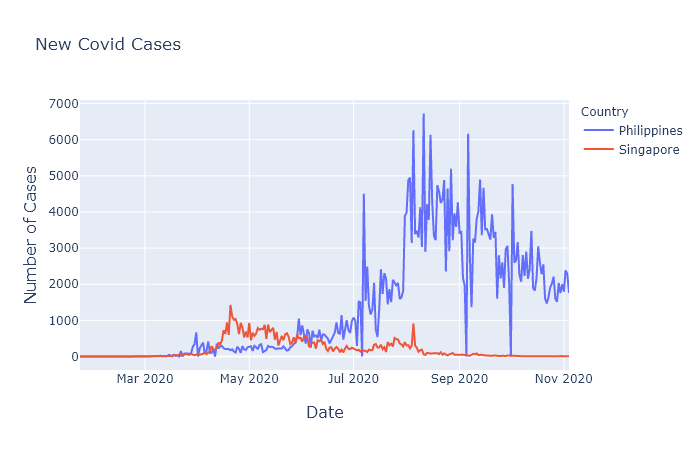

In [4]:
# Converted columns (ph_new_cases, sg_new_cases, case_dates) to list  
ph_new_cases = merged_data.ph_new_cases.tolist()
sg_new_cases = merged_data.sg_new_cases.tolist()
case_dates = merged_data.date.tolist()

# Plot the [New Covid Cases] line graph
line_graph = make_subplots(x_title='Date', y_title='Number of Cases')
line_graph.add_trace(
    go.Scatter(x=case_dates, y=ph_new_cases, name = 'Philippines', mode='lines'))
line_graph.add_trace(
    go.Scatter(x=case_dates, y=sg_new_cases, name = 'Singapore', mode='lines'))

line_graph.update_layout(height=500, width=800, legend_title_text = "Country", title_text="New Covid Cases")
line_graph.show("png")

#### How far (by number of cases) is Singapore's highest tallied new covid cases in one day, in comparison to PH?

In [5]:
print(f"""
Philippines highest tallied new covid cases is {int(max(ph_new_cases))}

Singapore highest tallied new covid cases is {int(max(sg_new_cases))}

Singapore is {int(int(abs(max(sg_new_cases) - max(ph_new_cases))))} far (by number of cases) in Philippines
""")


Philippines highest tallied new covid cases is 6725

Singapore highest tallied new covid cases is 1426

Singapore is 5299 far (by number of cases) in Philippines



#### What are the maximum number of cases and minimum number of cases tallied for each country?

In [7]:
print(f"""
Philippines
Max # of Cases: {int(max(ph_new_cases))}
Min # of Cases: {int(min(i for i in ph_new_cases if i > 0))}

Singapore
Max # of Cases: {int(max(sg_new_cases))}
Min # of Cases: {int(min(i for i in sg_new_cases if i > 0))}
""")


Philippines
Max # of Cases: 6725
Min # of Cases: 1

Singapore
Max # of Cases: 1426
Min # of Cases: 1



### 3. Create a bar graph which will compare the monthly average cases between Singapore and Philippines

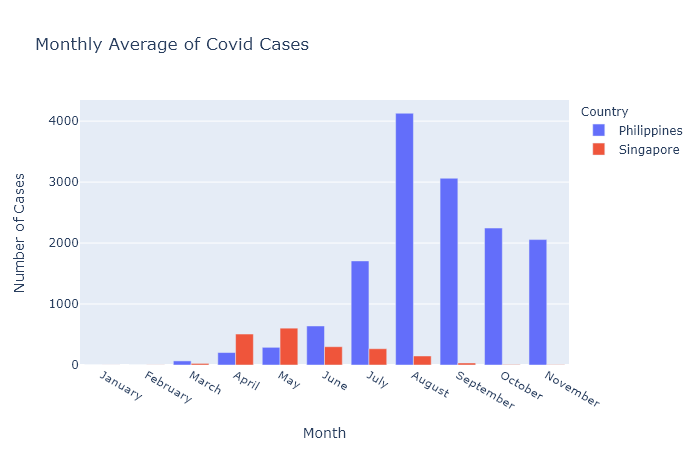

In [8]:
df_mvg_avg = merged_data

# Set the index to Date column and convert it to timestamp object and get the month (DataFrame.index.month)
df_mvg_avg.set_index('date',inplace=True)
df_mvg_avg.index = pd.to_datetime(df_mvg_avg.index)
months = df_mvg_avg.index.month

# Groupby MONTH and get the average (rounded and converted to int), also converted columns (ph_monthly_avg, sg_monthly_avg) to list  
ph_monthly_avg = [round(int(x)) for x in df_mvg_avg.groupby(months).ph_new_cases.mean().to_list()] 
sg_monthly_avg = [round(int(x)) for x in df_mvg_avg.groupby(months).sg_new_cases.mean().to_list()] 

# Converted the integer month to string and store to list
new_cases_dates = []

for x in months.to_list():
    xyz = dt.date(1900, x, 1).strftime('%B')
    if xyz not in new_cases_dates:
        new_cases_dates.append(dt.date(1900, x, 1).strftime('%B'))

# Plot the [monthly average covid cases] bar graph
bar_graph = go.Figure()
bar_graph.add_trace(go.Bar(x=new_cases_dates, y=ph_monthly_avg, name = 'Philippines'))
bar_graph.add_trace(go.Bar(x=new_cases_dates, y=sg_monthly_avg, name = 'Singapore'))
bar_graph.update_layout(
    title="Monthly Average of Covid Cases",
    xaxis_title="Month",
    yaxis_title="Number of Cases",
    legend_title="Country",
)
bar_graph.show("png")

#### Which country has tallied higher monthly average cases?

In [9]:
if max(ph_monthly_avg) > max(sg_monthly_avg):
    print(f"Philippines has the highest monthly average with total of {max(ph_monthly_avg)} cases.")
else:
    print(f"Singapore has the highest monthly average with total of {max(sg_monthly_avg)} cases.")

Philippines has the highest monthly average with total of 4129 cases.


### 4. Create a line graph plotting the cumulative daily death count of each country

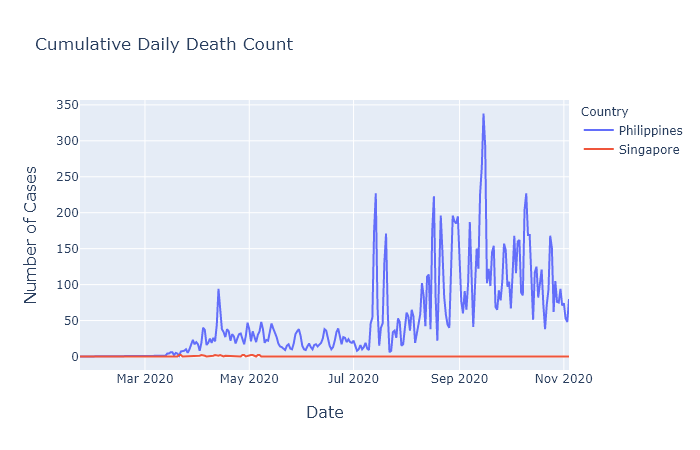

In [10]:
# CUMULATIVE DAILY DEATH
merged_data['ph_cumulative_daily_deaths'] = 0; merged_data['sg_cumulative_daily_deaths'] = 0

# get the count of death daily -> formula (current_count = past_count + current_count)
for x in range(len(merged_data)):
    if x == 0:
        merged_data.iloc[0, merged_data.columns.get_loc('ph_cumulative_daily_deaths')] = merged_data.iloc[0]['ph_new_deaths']
        merged_data.iloc[0, merged_data.columns.get_loc('sg_cumulative_daily_deaths')] = merged_data.iloc[0]['sg_new_deaths']
    else:
        merged_data.iloc[x, merged_data.columns.get_loc('ph_cumulative_daily_deaths')] = merged_data.iloc[x]['ph_new_deaths'] + merged_data.iloc[x-1]['ph_new_deaths']
        merged_data.iloc[x, merged_data.columns.get_loc('sg_cumulative_daily_deaths')] = merged_data.iloc[x]['sg_new_deaths'] + merged_data.iloc[x-1]['sg_new_deaths']

# converted columns (ph_cumulative_daily_deaths, sg_cumulative_daily_deaths) to list    
ph_cumulative_daily_deaths = merged_data.ph_cumulative_daily_deaths.tolist()
sg_cumulative_daily_deaths = merged_data.sg_cumulative_daily_deaths.tolist()

# plot the [cumulative daily death count] line graph
cumulative_line_graph = make_subplots(x_title='Date', y_title='Number of Cases')
cumulative_line_graph.add_trace(
    go.Scatter(x=case_dates, y=ph_cumulative_daily_deaths, name = 'Philippines'))
cumulative_line_graph.add_trace(
    go.Scatter(x=case_dates, y=sg_cumulative_daily_deaths, name = 'Singapore'))
cumulative_line_graph.update_layout(height=500, width=800, legend_title_text = "Country", title_text="Cumulative Daily Death Count")
cumulative_line_graph.show("png")